Predict Dog Size / Breed Based on Traits

In [19]:
#Load and inspect dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/dog_breeds_traits.csv')


In [20]:
# Show first 5 rows
print("🔹 First 5 rows:")
print(df.head())

# Dataset info
print("\n🔹 Dataset Info:")
print(df.info())

# Check for missing values
print("\n🔹 Missing values per column:")
print(df.isnull().sum())

🔹 First 5 rows:
                breed    size  energy_level  friendliness  trainability  \
0  Labrador Retriever   large             5             5             5   
1           Chihuahua   small             4             3             2   
2     German Shepherd   large             5             4             5   
3              Beagle  medium             4             5             3   
4   Poodle (Standard)  medium             3             5             5   

   shedding  barking  lifespan  origin_country   breed_group  
0         3        3        12          Canada      sporting  
1         2        5        14          Mexico           toy  
2         4        4        10         Germany       herding  
3         3        5        13         England         hound  
4         2        2        14  Germany/France  non-sporting  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count

In [21]:
from sklearn.preprocessing import LabelEncoder

# Copy the original dataframe
data = df.copy()

# Encode target variable (size: small, medium, large → 0,1,2)
size_encoder = LabelEncoder()
data['size_encoded'] = size_encoder.fit_transform(data['size'])

# Drop columns that wont be used for modeling
data = data.drop(['breed', 'size', 'origin_country'], axis=1)

# One-hot encode 'breed_group'
data = pd.get_dummies(data, columns=['breed_group'], drop_first=True)

# Show the preprocessed dataframe
print("🔹 Preprocessed Data Sample:")
print(data.head())

# Separate features and target
X = data.drop('size_encoded', axis=1)
y = data['size_encoded']


🔹 Preprocessed Data Sample:
   energy_level  friendliness  trainability  shedding  barking  lifespan  \
0             5             5             5         3        3        12   
1             4             3             2         2        5        14   
2             5             4             5         4        4        10   
3             4             5             3         3        5        13   
4             3             5             5         2        2        14   

   size_encoded  breed_group_hound  breed_group_non-sporting  \
0             0              False                     False   
1             2              False                     False   
2             0              False                     False   
3             1               True                     False   
4             1              False                      True   

   breed_group_sporting  breed_group_toy  breed_group_working  
0                  True            False                False  
1 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
# Get all possible class labels (0, 1, 2)
labels = [0, 1, 2]  #['large', 'medium', 'small']

target_names = size_encoder.inverse_transform(labels)

# print classification report
print("🔹 Classification Report:")
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))


🔹 Classification Report:
              precision    recall  f1-score   support

       large       1.00      1.00      1.00         2
      medium       0.00      0.00      0.00         0
       small       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       0.67      0.67      0.67         4
weighted avg       1.00      1.00      1.00         4



C:\Users\Vidura\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Vidura\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Vidura\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capit

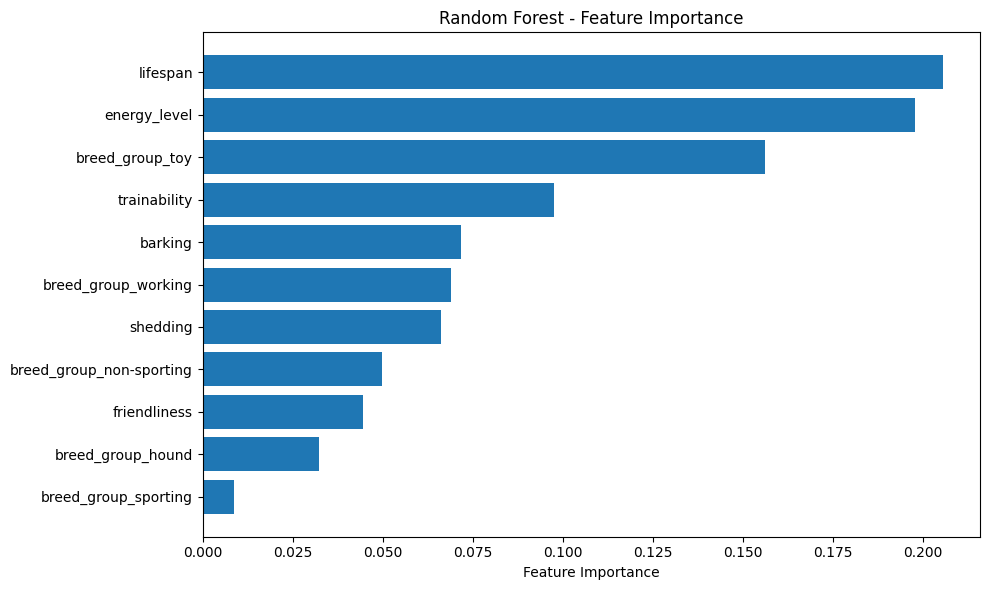

In [23]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [24]:
def predict_dog_size(traits_dict):
    """
    Predicts dog size from a dictionary of traits.
    """
    input_df = pd.DataFrame([traits_dict])

    # Make sure all columns match the training data
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0  # default for one-hot or missing

    # Reorder columns to match training data exactly
    input_df = input_df[X.columns]

    # Predict and decode the label
    prediction_encoded = rf_model.predict(input_df)[0]
    prediction_label = size_encoder.inverse_transform([prediction_encoded])[0]
    return prediction_label


In [25]:
# Example usage
sample_traits = {
    'lifespan': 13,
    'barking': 2,
    'shedding': 2,
    'energy': 3,
    'trainability': 4,
    'protectiveness': 3,
    'good_with_kids': 4
}

predicted_size = predict_dog_size(sample_traits)
print(f"🐶 Predicted Dog Size: {predicted_size}")


🐶 Predicted Dog Size: small


In [26]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, '../models/rf_model.pkl')

# Save the Label Encoder
joblib.dump(size_encoder, '../models/size_encoder.pkl')

# Save the feature columns (list of column names)
feature_cols = list(X.columns)
joblib.dump(feature_cols, '../models/feature_columns.pkl')

print("✅ Model, encoder, and feature columns saved!")


✅ Model, encoder, and feature columns saved!
